In [129]:
import h5py
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as npm
import pandas as pd

             Larmor radius  Cyclotron pulsation
Theoretical       0.666667              3.00000
Simulation        0.666667              2.99985


/jup/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/jup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


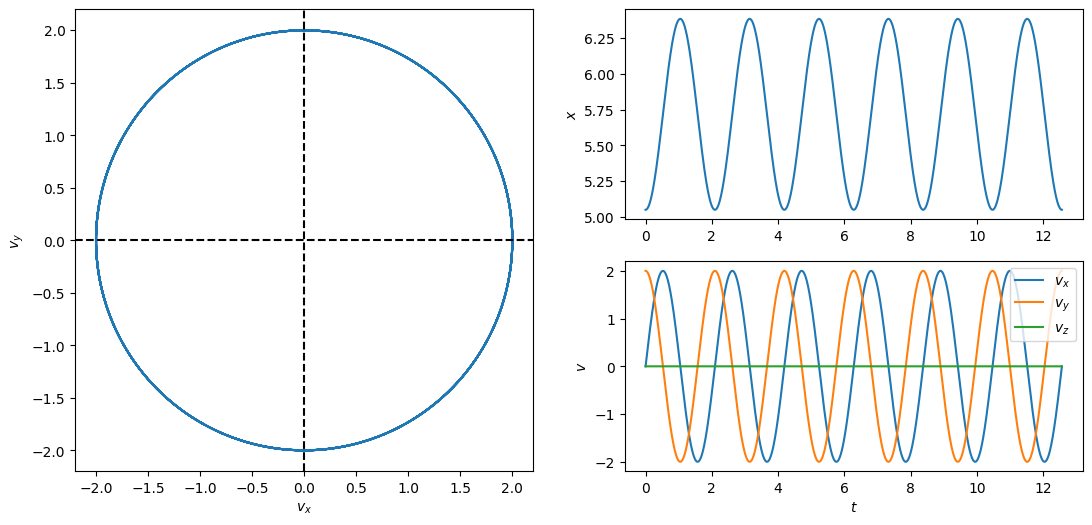

In [131]:
with h5py.File('uniform_bz.h5', 'r') as f:
    #print('Keys:', list(f.keys()))
    x = f['x'][:]
    vx, vy, vz = f['vx'][:], f['vy'][:], f['vz'][:]
    N = len(x)

    x_0 = 5.05
    v_0 = np.array([0, 2, 0])
    B_0 = np.array([0, 0, 3])
    q, m = 1, 1
    dt = 1e-3

    t_steps = np.arange(N)*dt

    cyclotron_th = q*np.linalg.norm(B_0)/m
    larmor_th = np.linalg.norm(v_0)/cyclotron_th
    
    larmor_sim = np.max(x-x_0)/2

    freqs = np.fft.fftfreq(N, d=dt)
    spectrum = np.fft.ifft(x-x_0-larmor_sim)
    idx = np.argmax(np.abs(spectrum[:N//2]))
    f = abs(freqs[idx])
    cyclotron_sim = 2*np.pi*f 

    data_simth = {
        "Larmor radius": [larmor_th, larmor_sim],
        "Cyclotron pulsation": [cyclotron_th, cyclotron_sim]
    }
    
    table = pd.DataFrame(data_simth, index=["Theoretical", "Simulation"])
    
    print(table)

    fig = plt.figure(figsize=(13, 6), constrained_layout=True)
    gs = gridspec.GridSpec(2, 2)
    
    ax0 = plt.subplot(gs[0:2,0])
    ax0.plot(vx, vy)
    ax0.axhline(0, 0, 1, c='k', ls='--')
    ax0.axvline(0, 0, 1, c='k', ls='--')
    ax0.set_xlabel(r'$v_x$')
    ax0.set_ylabel(r'$v_y$')

    ax1 = plt.subplot(gs[0:1,1])
    ax1.plot(t_steps, x)
    #ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$x$')
    
    ax2 = plt.subplot(gs[1:2,1])
    ax2.plot(t_steps, vx, label=r'$v_x$')
    ax2.plot(t_steps, vy, label=r'$v_y$')
    ax2.plot(t_steps, vz, label=r'$v_z$')
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(r'$v$')
    
    plt.legend()
    plt.show

             Larmor radius  Cyclotron pulsation  ExB drift
Theoretical        0.12500             8.000000   0.125000
Simulation         0.12552             7.999599   0.125141


/jup/.venv/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/jup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


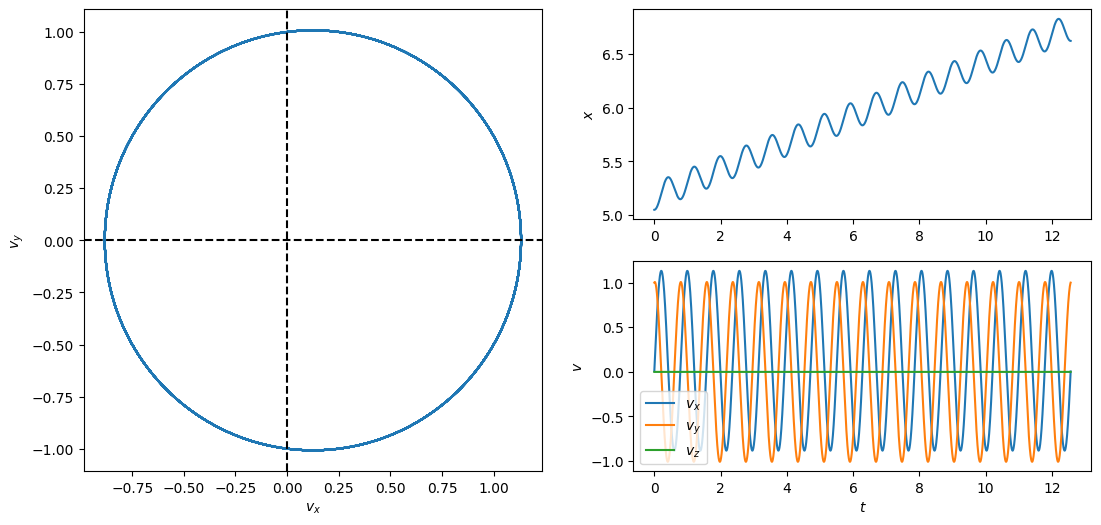

In [169]:
with h5py.File('drift_ey.h5', 'r') as f:
    #print('Keys:', list(f.keys()))
    x = f['x'][:]
    vx, vy, vz = f['vx'][:], f['vy'][:], f['vz'][:]
    N = len(x)

    x_0 = 5.05
    v_0 = np.array([0, 1, 0])
    B_0 = np.array([0, 0, 8])
    E_0 = np.array([0, 1, 0])
    q, m = 1, 1
    dt = 1e-3

    t_steps = np.arange(N)*dt

    cyclotron_th = q*np.linalg.norm(B_0)/m
    larmor_th = np.linalg.norm(v_0)/cyclotron_th

    drift_th = E_0[1]/B_0[2]

    drift_sim = np.polyfit(t_steps, x, 1)[0]
    
    larmor_sim = np.max(x-drift_sim*t_steps-x_0)/2

    freqs = np.fft.fftfreq(N, d=dt)
    spectrum = np.fft.ifft(x-drift_sim*t_steps-x_0-larmor_sim)
    idx = np.argmax(np.abs(spectrum[:N//2]))
    f = abs(freqs[idx])
    cyclotron_sim = 2*np.pi*f 

    data_simth = {
        "Larmor radius": [larmor_th, larmor_sim],
        "Cyclotron pulsation": [cyclotron_th, cyclotron_sim],
        "ExB drift": [drift_th, drift_sim]
    }
    
    table = pd.DataFrame(data_simth, index=["Theoretical", "Simulation"])
    
    print(table)

    fig = plt.figure(figsize=(13, 6), constrained_layout=True)
    gs = gridspec.GridSpec(2, 2)
    
    ax0 = plt.subplot(gs[0:2,0])
    ax0.plot(vx, vy)
    ax0.axhline(0, 0, 1, c='k', ls='--')
    ax0.axvline(0, 0, 1, c='k', ls='--')
    ax0.fill([0, drift_th], [-1, 1])
    ax0.set_xlabel(r'$v_x$')
    ax0.set_ylabel(r'$v_y$')

    ax1 = plt.subplot(gs[0:1,1])
    ax1.plot(t_steps, x)
    #ax1.plot(t_steps, drift_th*t_steps + x_0 + larmor_th, '--', label='theoretical drift')
    #ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$x$')
    
    ax2 = plt.subplot(gs[1:2,1])
    ax2.plot(t_steps, vx, label=r'$v_x$')
    ax2.plot(t_steps, vy, label=r'$v_y$')
    ax2.plot(t_steps, vz, label=r'$v_z$')
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(r'$v$')
    
    plt.legend()
    plt.show